<a href="https://colab.research.google.com/github/rohankavari/MachineLearning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas.util.testing as tm
import seaborn as sns

Dataset from:-
https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [169]:
df=pd.read_excel("/content/drive/MyDrive/dataset/Real estate valuation data set.xlsx")
df.drop([0],inplace=True)
df.drop([113],inplace=True)

In [170]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2013.148621,17.701703,1090.019352,4.082725,24.969000,121.533340,37.860827
std,0.282499,11.406276,1264.616702,2.936394,0.012428,0.015397,12.992414
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,11.200000
25%,2012.916667,8.950000,289.324800,1.000000,24.963010,121.527600,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.500000
75%,2013.416667,28.100000,1455.798000,6.000000,24.977450,121.543395,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


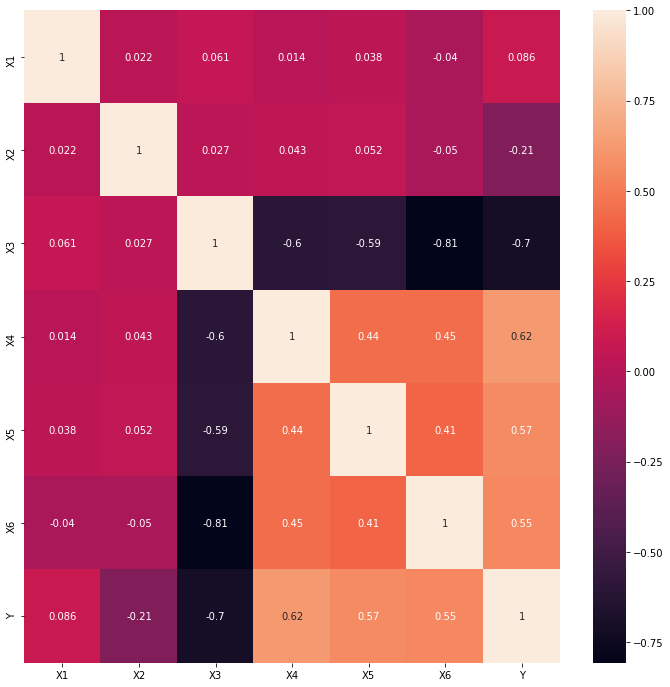

In [171]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True)

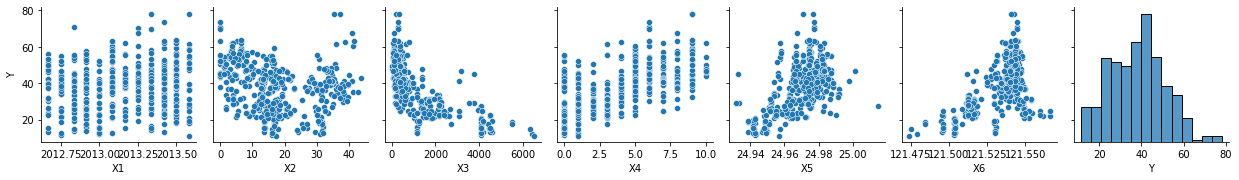

In [172]:
pp = sns.pairplot(data=df,y_vars=['Y'])

In [173]:
mod = ols("Y~X2+X3+X3+X4+X5+X6",data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           2.35e-85
Time:                        10:35:43   Log-Likelihood:                -1431.8
No. Observations:                 411   AIC:                             2876.
Df Residuals:                     405   BIC:                             2900.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7638.0469   5514.849     -1.385      0.1

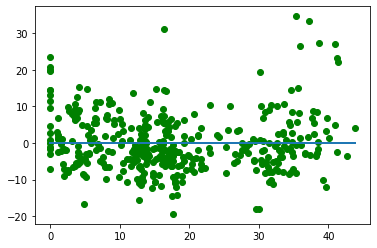

In [174]:
y_pred=res.fittedvalues
e=df['Y']-y_pred
plt.scatter(df['X2'], e ,c="green")
plt.plot([df['X2'].min(), df['X2'].max()], [0, 0], linewidth=2);

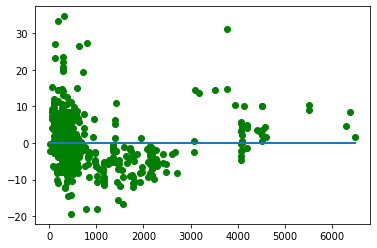

In [175]:
plt.scatter(df['X3'], e ,c="green")
plt.plot([df['X3'].min(), df['X3'].max()], [0, 0], linewidth=2);

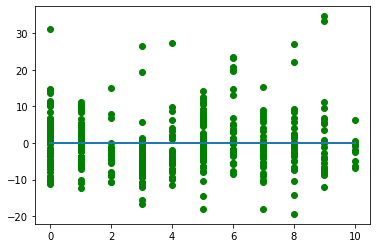

In [176]:
plt.scatter(df['X4'], e ,c="green")
plt.plot([df['X4'].min(), df['X4'].max()], [0, 0], linewidth=2);

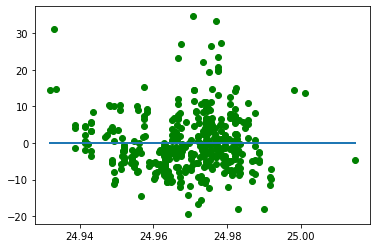

In [177]:
plt.scatter(df['X5'], e ,c="green")
plt.plot([df['X5'].min(), df['X5'].max()], [0, 0], linewidth=2);

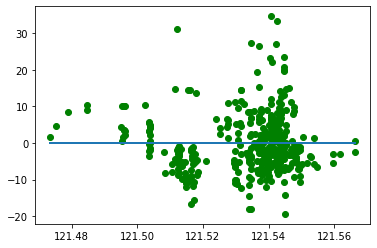

In [178]:
plt.scatter(df['X6'], e ,c="green")
plt.plot([df['X6'].min(), df['X6'].max()], [0, 0], linewidth=2)

In [179]:
df['logX2']=np.log(df['X2'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [180]:
mod = ols("Y~logX2+X3+X3+X4+X5+X6",data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           1.51e-85
Time:                        10:35:44   Log-Likelihood:                -1351.6
No. Observations:                 394   AIC:                             2715.
Df Residuals:                     388   BIC:                             2739.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9808.9121   5356.948     -1.831      0.0

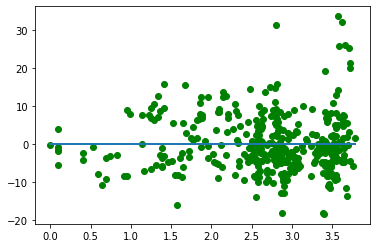

In [181]:
y_pred=res.fittedvalues
e=df['Y']-y_pred
plt.scatter(df['logX2'], e ,c="green")
plt.plot([df['logX2'].min(), df['logX2'].max()], [0, 0], linewidth=2);

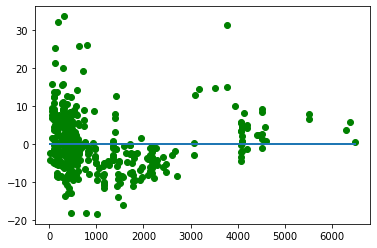

In [182]:
plt.scatter(df['X3'], e ,c="green")
plt.plot([df['X3'].min(), df['X3'].max()], [0, 0], linewidth=2);

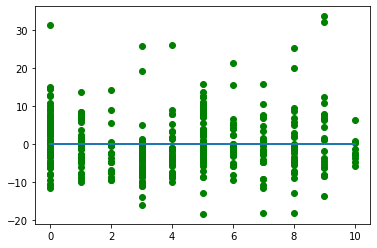

In [183]:
plt.scatter(df['X4'], e ,c="green")
plt.plot([df['X4'].min(), df['X4'].max()], [0, 0], linewidth=2);

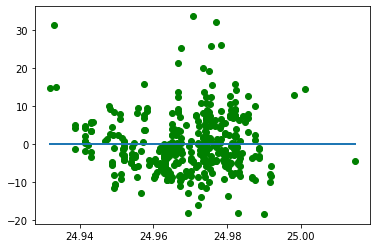

In [184]:
plt.scatter(df['X5'], e ,c="green")
plt.plot([df['X5'].min(), df['X5'].max()], [0, 0], linewidth=2);

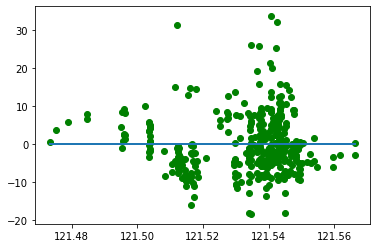

In [185]:
plt.scatter(df['X6'], e ,c="green")
plt.plot([df['X6'].min(), df['X6'].max()], [0, 0], linewidth=2)

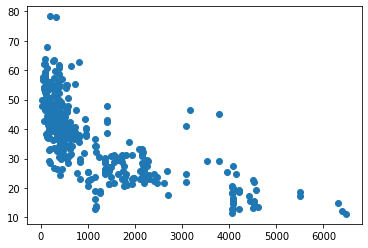

In [186]:
plt.scatter(df['X3'], df['Y'])

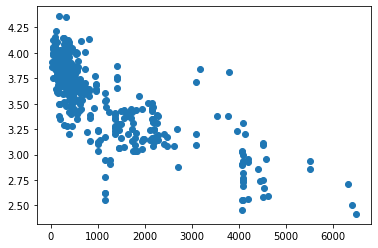

In [187]:
plt.scatter(df['X3'], np.log(df['Y']))

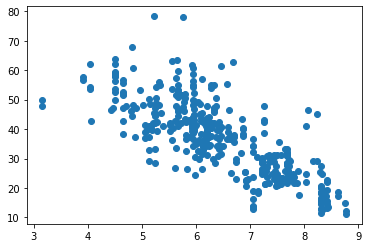

In [188]:
plt.scatter(np.log(df['X3']), df['Y'])

In [189]:
df['logX2']=np.log(df['X2'])
df['logX3']=np.log(df['X3'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [190]:
mod = ols("Y~logX2+logX3+X3+X4+X5+X6",data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 22 Apr 2021   Prob (F-statistic):           3.08e-99
Time:                        10:35:46   Log-Likelihood:                -1316.8
No. Observations:                 394   AIC:                             2648.
Df Residuals:                     387   BIC:                             2675.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.715e+04   4982.605     -3.441      0.0

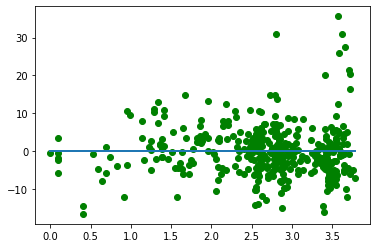

In [191]:
y_pred=res.fittedvalues
e=df['Y']-y_pred
plt.scatter(df['logX2'], e ,c="green")
plt.plot([df['logX2'].min(), df['logX2'].max()], [0, 0], linewidth=2);

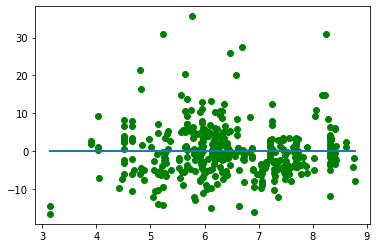

In [192]:
plt.scatter(df['logX3'], e ,c="green")
plt.plot([df['logX3'].min(), df['logX3'].max()], [0, 0], linewidth=2);

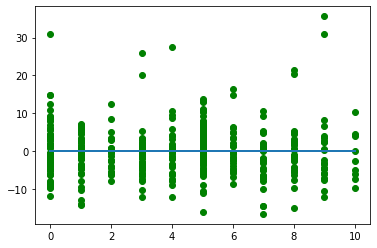

In [193]:
plt.scatter(df['X4'], e ,c="green")
plt.plot([df['X4'].min(), df['X4'].max()], [0, 0], linewidth=2);

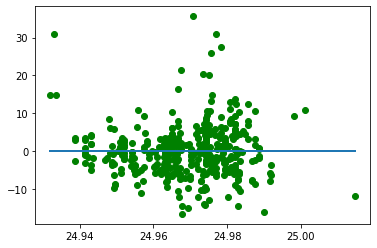

In [194]:
plt.scatter(df['X5'], e ,c="green")
plt.plot([df['X5'].min(), df['X5'].max()], [0, 0], linewidth=2);

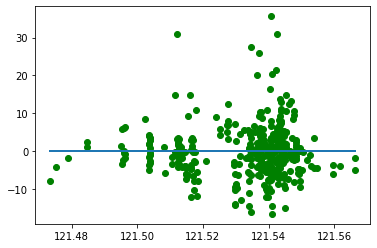

In [195]:
plt.scatter(df['X6'], e ,c="green")
plt.plot([df['X6'].min(), df['X6'].max()], [0, 0], linewidth=2)

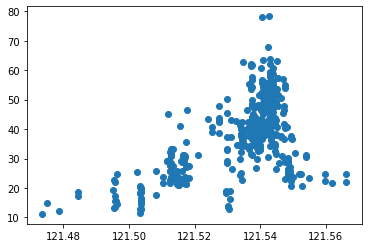

In [196]:
plt.scatter(df['X6'], df['Y'])

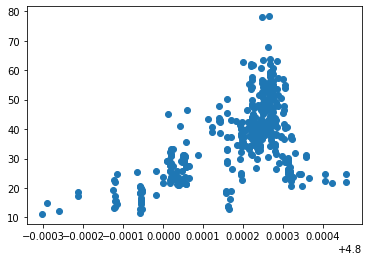

In [197]:
plt.scatter(np.log(df['X6']), df['Y'])

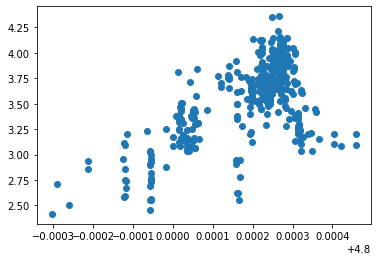

In [198]:
plt.scatter(np.log(df['X6']), np.log(df['Y']))

In [200]:
df['logY']=np.log(df['Y'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

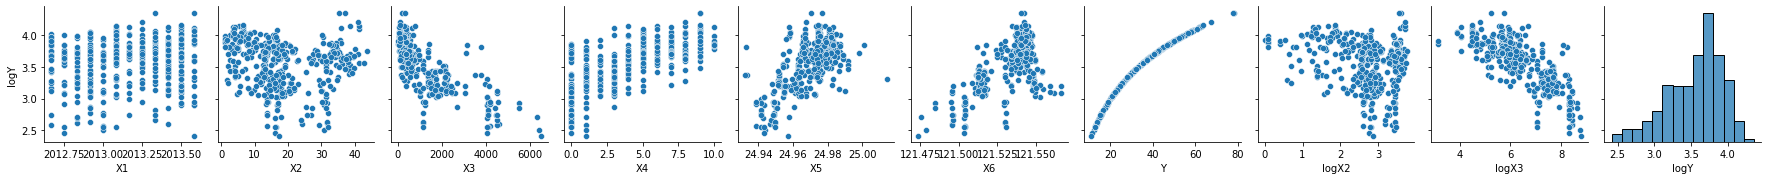

In [201]:
pp = sns.pairplot(data=df,y_vars=['logY'])

In [202]:
mod = ols("logY~logX2+logX3+X4+X5+X6",data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   logY   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     237.5
Date:                Thu, 22 Apr 2021   Prob (F-statistic):          1.18e-115
Time:                        10:36:33   Log-Likelihood:                 100.48
No. Observations:                 394   AIC:                            -189.0
Df Residuals:                     388   BIC:                            -165.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -608.9452     98.425     -6.187      0.0

In [ ]:
y_pred=res.fittedvalues
e=df['logY']-y_pred


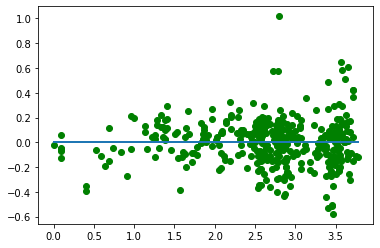

In [208]:
plt.scatter(df['logX2'], e ,c="green")
plt.plot([df['logX2'].min(), df['logX2'].max()], [0, 0], linewidth=2);

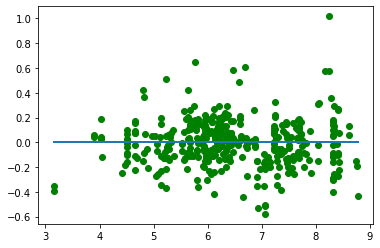

In [204]:
plt.scatter(df['logX3'], e ,c="green")
plt.plot([df['logX3'].min(), df['logX3'].max()], [0, 0], linewidth=2);

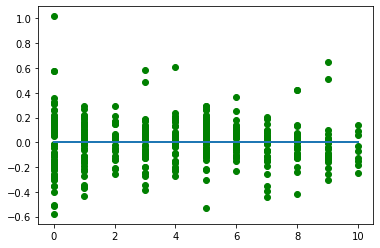

In [205]:
plt.scatter(df['X4'], e ,c="green")
plt.plot([df['X4'].min(), df['X4'].max()], [0, 0], linewidth=2);

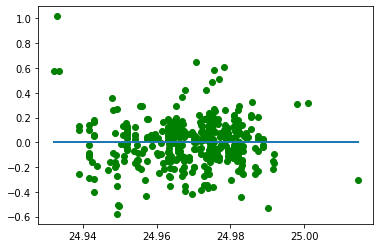

In [206]:
plt.scatter(df['X5'], e ,c="green")
plt.plot([df['X5'].min(), df['X5'].max()], [0, 0], linewidth=2);

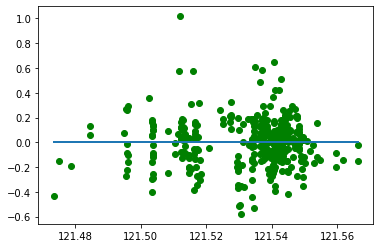

In [207]:
plt.scatter(df['X6'], e ,c="green")
plt.plot([df['X6'].min(), df['X6'].max()], [0, 0], linewidth=2)